In [1]:
%reset
import sys
sys.path.append('../../')
import numpy as np
import pandas as pd
import datetime
from tsa import UVariateTimeSeriesClass
from tsa import UVariateTimeSeriesForecaster
from tsa import ProphetForecaster
from tsa import ARIMAForecaster
from tsa import SARIMAForecaster
from tsa import AutoARIMAForecaster
from tsa import LinearForecaster
from tsa import ExponentialSmoothingForecaster
from tsa import DLMForecaster
from tsa import GridSearchClass
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
%matplotlib inline
from random import sample

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


##### Read in the data

In [2]:
try:
    ts_univ = pd.read_csv('../../data/AAPL.csv', index_col='Date', usecols=['Date','Adj Close'], parse_dates=True)
    time_format = "%Y-%m-%d"
    freq= 'D' 
    
    print ( "====================================\nData: data of shape " + str(ts_univ.shape) + " has been read in." ) 
except IOError as e:
    print("Could not read in the data: {}".format(e))

Data: data of shape (4475, 1) has been read in.


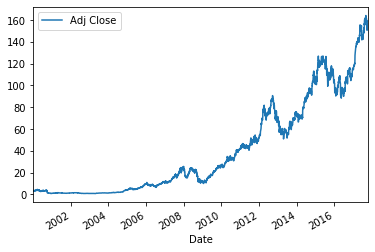

In [3]:
ts_univ.plot()

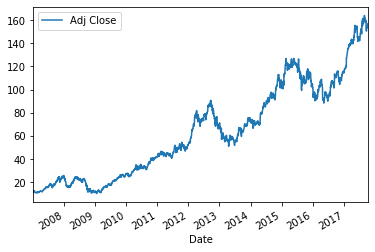

In [4]:
ts_univ = ts_univ[ts_univ.index >= datetime.datetime.strptime("2007-01-01", time_format)]
ts_univ.plot()

##### Basic Class: UVariateTimeSeriesClass

2019-10-25 16:50:05,820 | uvts_cls | INFO : Received time series data of range: 2007-01-03 00:00:00 - 2017-10-13 00:00:00 and shape: (2716, 1)
2019-10-25 16:50:05,833 | uvts_cls | INFO : Time series resampled at frequency: <Day>. New shape of the data: (3937, 1)
2019-10-25 16:50:05,841 | uvts_cls | INFO : Using time series data of range: 2007-01-03 00:00:00 - 2017-10-13 00:00:00 and shape: (3937, 1)


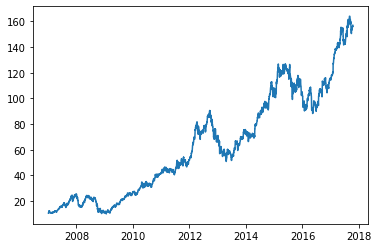

In [5]:
uvts_cls = UVariateTimeSeriesClass(ts_df=ts_univ, time_format=time_format, freq=freq, fill_method='ffill')
plt.plot(uvts_cls.ts_df)

2019-10-25 16:50:07,750 | numexpr.utils | INFO : NumExpr defaulting to 8 threads.


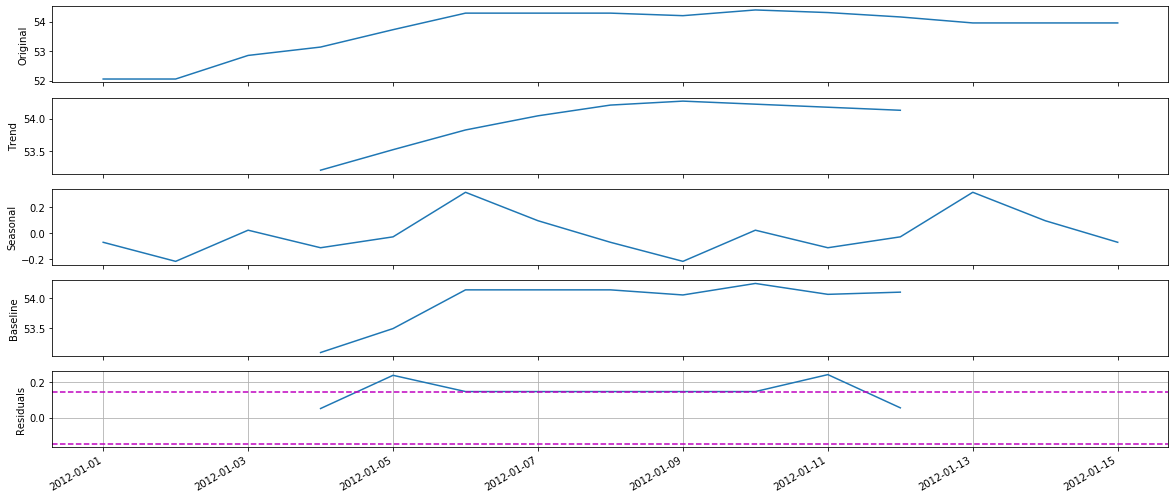

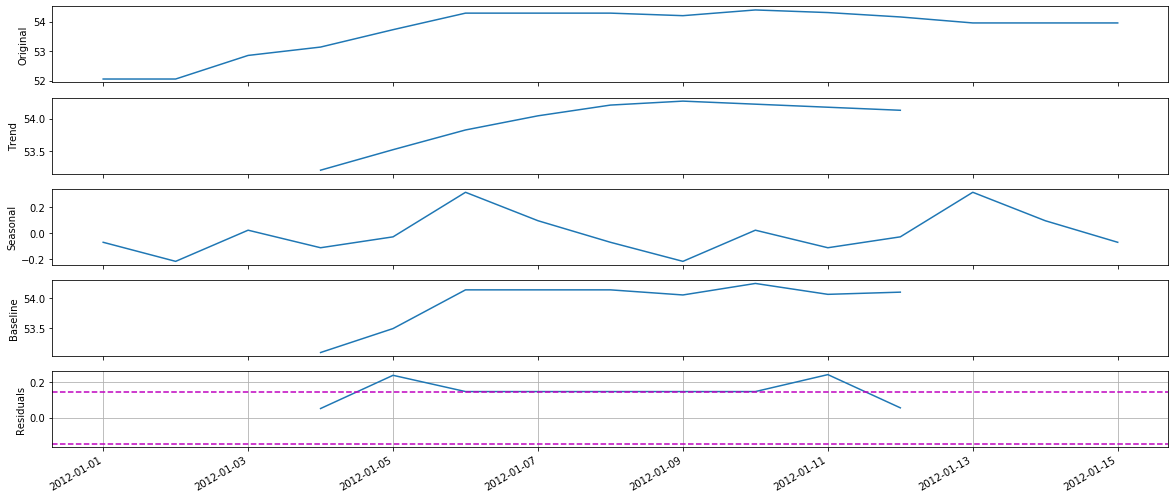

In [6]:
uvts_cls.ts_decompose(params={'model':'additive',
                              'from': '2012-01-01',
                               'to' : '2012-01-15'})
uvts_cls.plot_decompose()

##### Use one Forecaster.

##### SARIMA Forecaster

In [ ]:
tsf_obj = SARIMAForecaster(ts_df=ts_univ, time_format=time_format, freq=freq, fill_method='ffill',
                           n_test=365, n_val=180,
                           hyper_params = {
                                           'order': [(1,1,1), (0,1,0)],
                                           's_order': [(0,0,0,12), (0,1,0,12)],
                                           'trend': ['linear']
                           })                            

##### Prophet Forecaster

In [ ]:
tsf_obj = ProphetForecaster(ts_df=ts_univ, time_format=time_format, freq=freq, fill_method='ffill',
                            n_test=365, n_val=180,
                            hyper_params = {
                                            'prophet_interval_width': [0.95],
                                            'yearly_seasonality': [True, False],
                                            'weekly_seasonality': [True, False],
                                            'monthly_seasonality': [False],
                                            'quarterly_seasonality': [False],
                                            'daily_seasonality': [True],
                                            'weekend_seasonality': [False],
                                            'changepoint_prior_scale': [0.001],
                                            'consider_holidays': [False],
                                            'country':['US'],
                                            'diagnose':False})       

##### UVariateTimeSeriesForecaster

In [9]:
tsf_obj = UVariateTimeSeriesForecaster(forecasters=['prophet', 'auto_arima', 'arima', 'dlm', 'exponential smoothing'],
                                       ts_df=ts_univ, time_format=time_format, freq=freq, n_test=365,
                                       trend='constant linear',
                                       seasonal_periods=7,
                                       seasonal=True,
                                       max_p=2,
                                       max_q=2,
                                       max_Q=2,
                                       max_P=2,
                                       #d=0,
                                       order = (1,0,1),
                                       #s_order = (1, 0, 2, 7),
                                       dlm_trend={'degree': 1, 'discount': 0.7, 'name': 'trend1', 'w': 5},
                                       dlm_seasonality = {'period': 7, 'discount': 0.7, 'name': 'seas1', 'w': 10},
                                       prophet_interval_width=0.95,
                                       yearly_seasonality=True,
                                       weekly_seasonality=True,
                                       monthly_seasonality=False,
                                       quarterly_seasonality=False,
                                       daily_seasonality=True,
                                       weekend_seasonality=False,
                                       changepoint_prior_scale=0.001,
                                       consider_holidays=False,
                                       country='US',
                                       diagnose=False)                                       

#UVariateTimeSeriesForecaster.__mro__ #Method Resolution Order
#einstellung - ffill oder interpolated value

2019-10-25 17:00:26,156 | uvts_cls | INFO : Received time series data of range: 2007-01-03 00:00:00 - 2017-10-13 00:00:00 and shape: (2716, 1)
2019-10-25 17:00:26,165 | uvts_cls | INFO : Time series resampled at frequency: <Day>. New shape of the data: (3937, 1)
2019-10-25 17:00:26,172 | uvts_cls | INFO : Using time series data of range: 2007-01-03 00:00:00 - 2017-10-13 00:00:00 and shape: (3937, 1)


In [10]:
tsf_obj.ts_transform(transform='log10').ts_fit(suppress=True) 

2019-10-25 17:00:33,835 | prophet | INFO : Trying to fit the Prophet model....
2019-10-25 17:00:36,062 | prophet | INFO : Model successfully fitted to the data!
2019-10-25 17:00:36,063 | prophet | INFO : Computing fitted values and residuals...
2019-10-25 17:00:43,319 | prophet | INFO : Done.
2019-10-25 17:00:43,324 | ARIMA | INFO : Trying to fit the ARIMA model....
2019-10-25 17:00:43,799 | ARIMA | INFO : Time elapsed: 0.47360920906066895 sec.
2019-10-25 17:00:43,801 | ARIMA | INFO : Model successfully fitted to the data!
2019-10-25 17:00:43,802 | ARIMA | INFO : Computing fitted values and residuals...
2019-10-25 17:00:43,807 | ARIMA | INFO : Done.
2019-10-25 17:00:43,813 | AutoARIMA | INFO : Trying to fit the Auto ARIMA model....
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=-24744.784, BIC=-24701.520, Fit time=6.802 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=-24749.005, BIC=-24730.463, Fit time=0.969 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_

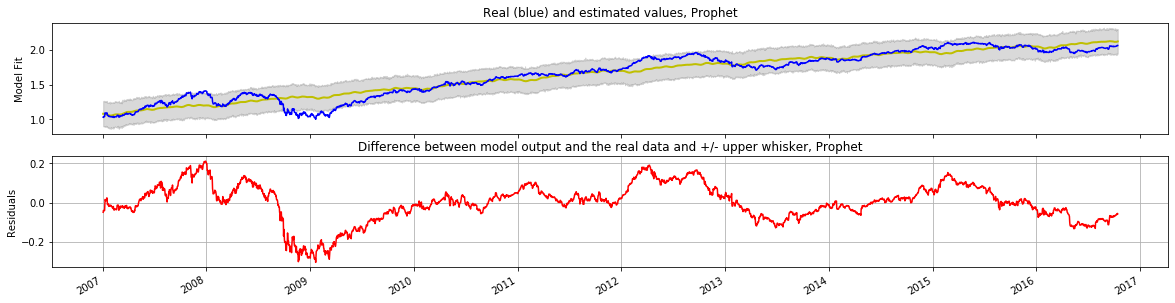

Residuals statistics
count    3572.000000
mean        0.000159
std         0.011683
min        -0.532364
25%        -0.001722
50%         0.000029
75%         0.002817
max         0.056484
dtype: float64


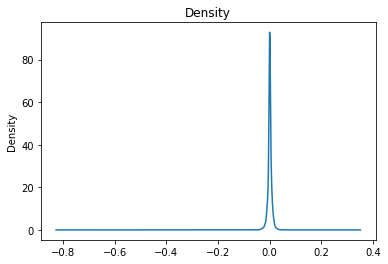

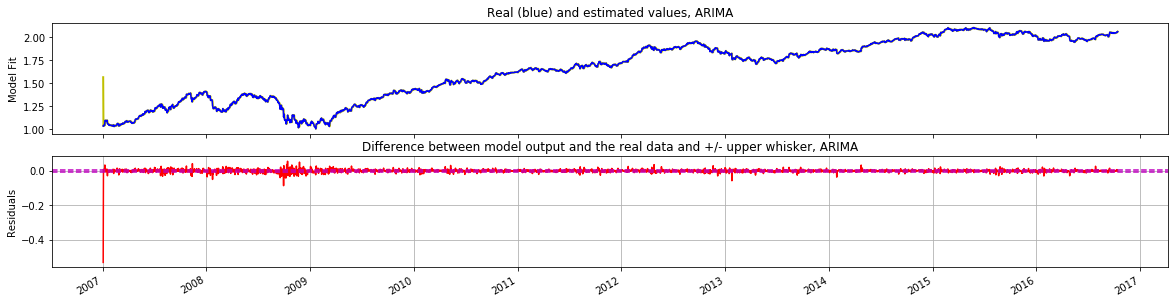

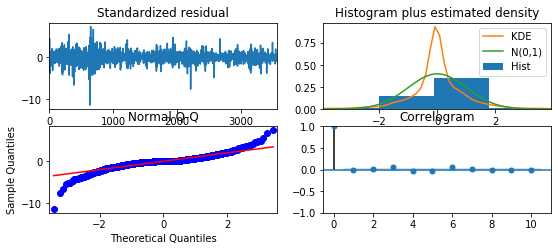

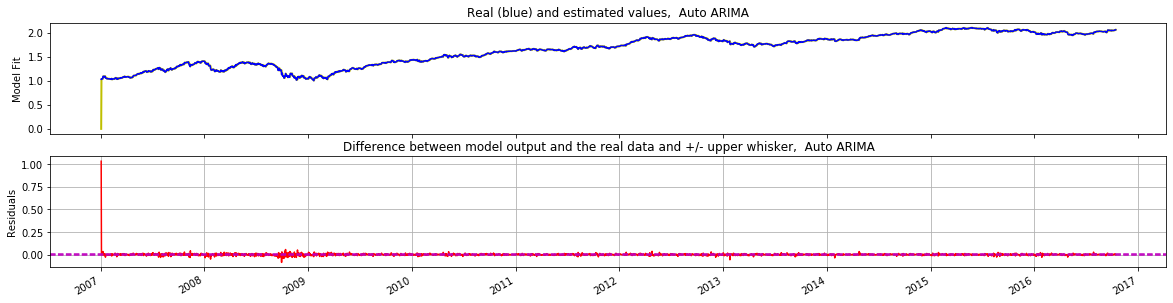

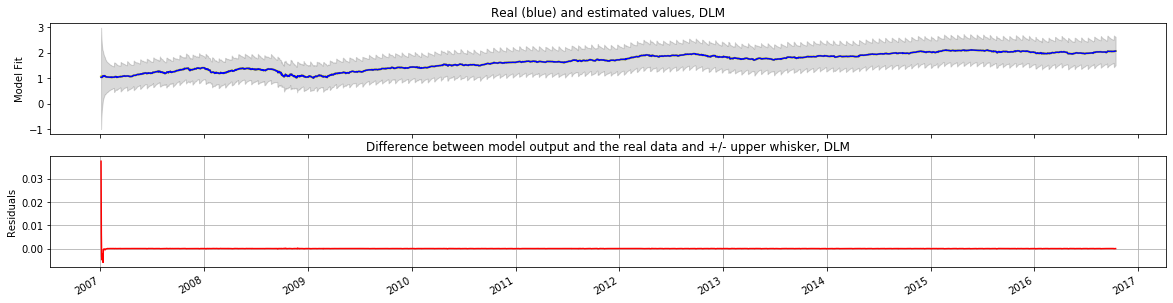

In [11]:
tsf_obj.ts_diagnose()

In [ ]:
tsf_obj.plot_residuals()

2019-10-25 17:02:03,233 | prophet | INFO : Evaluating the fitted Prophet model on the test data...
2019-10-25 17:02:05,302 | prophet | INFO : RMSE on test data: 0.04215253937780206


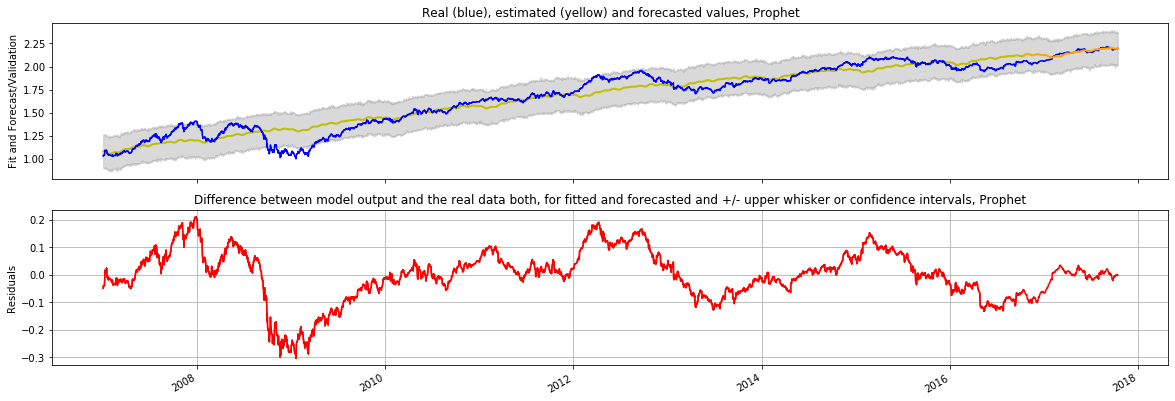

2019-10-25 17:02:05,682 | ARIMA | INFO : Evaluating the fitted ARIMA model on the test data...
2019-10-25 17:02:05,689 | ARIMA | INFO : RMSE on the test data: 0.10548870023770997


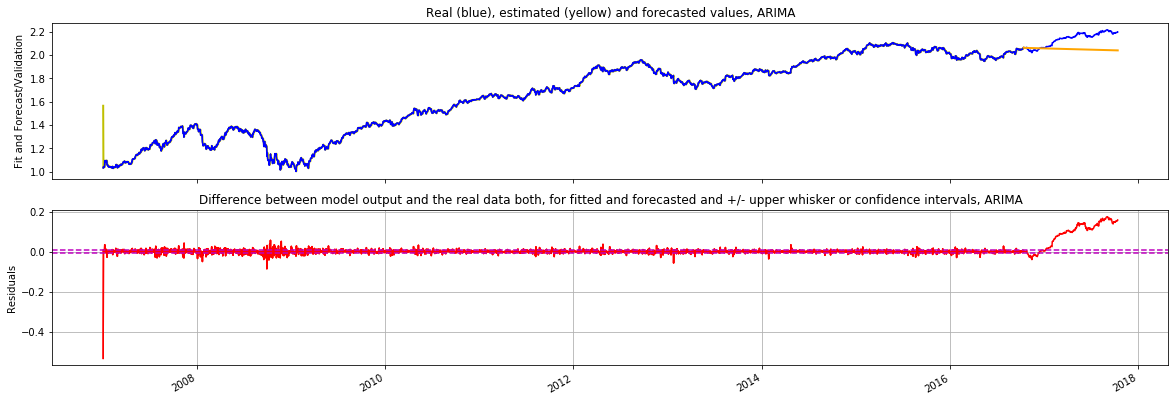

2019-10-25 17:02:06,041 | AutoARIMA | INFO : Evaluating the fitted ARIMA model on the test data...
2019-10-25 17:02:06,070 | AutoARIMA | INFO : RMSE on test data: 0.07045414274678384


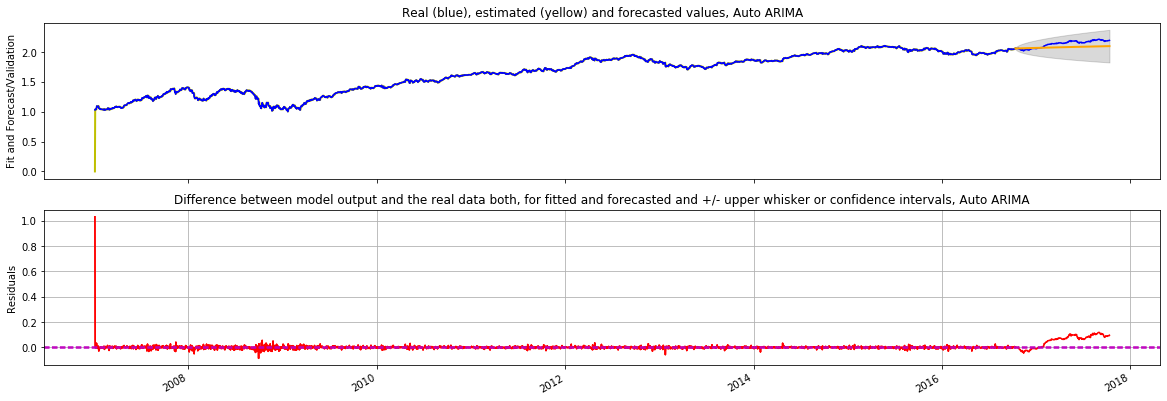

2019-10-25 17:02:06,477 | dlm | INFO : Evaluating the fitted DLM model on the test data...
2019-10-25 17:02:06,633 | dlm | INFO : RMSE on test data: 0.761937108404313


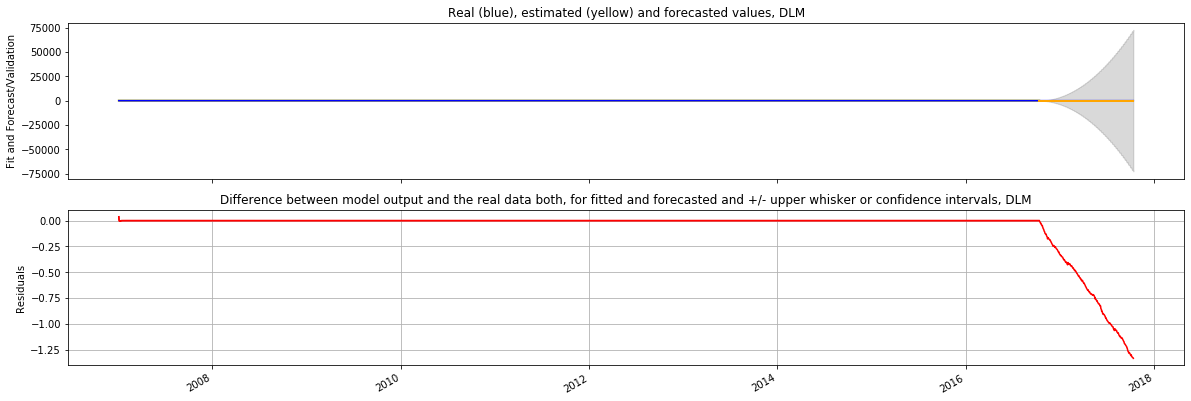

2019-10-25 17:02:06,953 | uvtsf | INFO : The best model selected as: ProphetForecaster


In [12]:
tsf_obj.ts_test(show_plot=True)

In [13]:
tsf_obj.ts_validate(show_plot=True)

2019-10-25 17:02:32,610 | prophet | INFO : Trying to fit the Prophet model....
2019-10-25 17:02:37,219 | prophet | INFO : Model successfully fitted to the data!
2019-10-25 17:02:37,220 | prophet | INFO : Computing fitted values and residuals...
2019-10-25 17:02:44,777 | prophet | INFO : Done.
2019-10-25 17:02:44,778 | uvts_cls | ERROR : Nothing to test. Call ts_forecast() or specify amount of test data when initializing the object.
Traceback (most recent call last):
  File "../..\tsa\uvts.py", line 598, in _check_ts_test
    assert self._test_dt is not None
AssertionError


2019-10-25 17:02:55,585 | prophet | INFO : Fitting using all data....
2019-10-25 17:02:55,587 | prophet | INFO : Trying to fit the Prophet model....
2019-10-25 17:02:55,589 | prophet | INFO : ...via using parameters

forecasters ['prophet', 'auto_arima', 'arima', 'dlm', 'exponential smoothing']
_dict_models {'prophet': <tsa.prophet.ProphetForecaster object at 0x00000206ECD1CD48>, 'arima': <tsa.arima.ARIMAForecaster object at 0x00000206ECDA5B88>, 'auto_arima': <tsa.auto_arima.AutoARIMAForecaster object at 0x00000206ECFFB488>, 'expsm': <tsa.exp_smoothing.ExponentialSmoothingForecaster object at 0x00000206ECDEA708>, 'dlm': <tsa.dlm.DLMForecaster object at 0x00000206ECD46C48>}
best_model {}
_uvtsf_logger <tsa.logger.Logger object at 0x00000206ECDE5988>
_lin_logger <tsa.logger.Logger object at 0x00000206ECDE5CC8>
_aarima_logger <tsa.logger.Logger object at 0x00000206ECDE5E88>
_aarima_seasonal True
_aarima_trend ct
_start_p 1
_start_q 1
_max_p 2
_max_q 2
_d None
_D None
_start_P 1
_start_Q 1

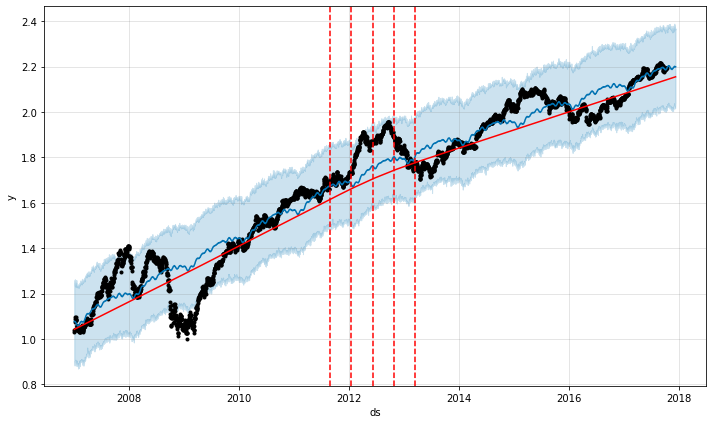

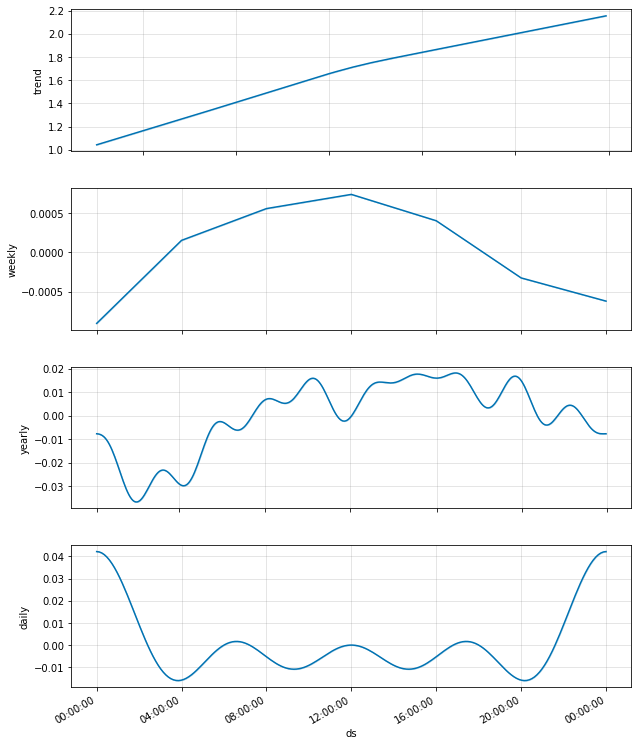

In [14]:
tsf_obj.ts_forecast(n_forecast = 60, suppress=False)